In [27]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.linear_model import LinearRegression

In [28]:
data=load_boston()

In [29]:
y=data['target']
x=data['data']

In [30]:
df = pd.DataFrame(x)
y=pd.DataFrame(y,columns=['target'])

In [31]:
df=pd.concat([df,y],axis=1)

/Users/JoaoGomes/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='target', ylabel='Density'>

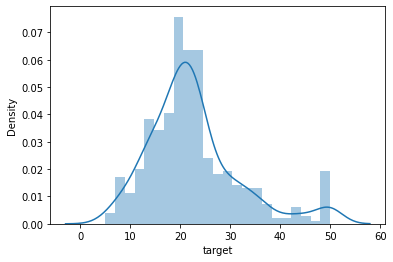

In [16]:
sns.distplot(df.target)

# Train

In [174]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2,random_state=42)

In [177]:
rf=RandomForestRegressor(n_estimators=50,random_state=42)
gb=GradientBoostingRegressor(n_estimators=15,max_depth=3,random_state=42)
lr=LinearRegression()

In [178]:
ml=gb
ml.fit(xtrain,ytrain.values.reshape(-1,))
ml.score(xtest,ytest), ml.score(xtrain,ytrain)

(0.8192173482624276, 0.8620743607800948)

In [179]:
error_train= np.power(ml.predict(xtrain)-ytrain['target'].values,2)
error_test= np.power(ml.predict(xtest)-ytest['target'].values,2)

In [180]:
error_test.mean(), error_train.mean()

(13.257475781671314, 11.98206975486963)

In [181]:
error_test.std(), error_train.std()

(25.772882413060668, 20.210211791121885)

/Users/JoaoGomes/miniconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0, 0.5, 'Density')

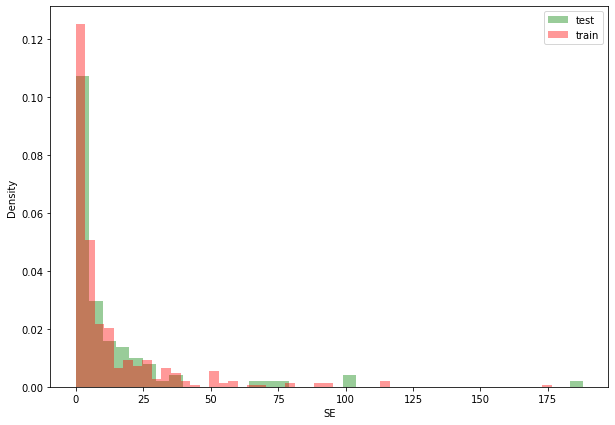

In [182]:
plt.figure(figsize=(10,7))
sns.distplot(error_test,kde=False,norm_hist=True, color='green')
sns.distplot(error_train,kde=False,norm_hist=True,color='red')
plt.legend(['test','train'])
plt.xlabel('SE')
plt.ylabel('Density')

In [201]:
lr=LinearRegression()
ypred=ml.predict(xtest)
lr.fit(ytest['target'].values.reshape(-1,1),ypred)

LinearRegression()

In [202]:
y_pred_lr=lr.predict(ytest['target'].values.reshape(-1,1))

In [251]:
lr.score(ytest['target'].values.reshape(-1,1),ypred)

0.9037820486140887

In [185]:
ydf=ytest.copy()
ydf['pred']=ypred

In [188]:
ydf.sort_values(by='target',ascending=True,inplace=True)

In [207]:
ydf.reset_index(drop=True,inplace=True)

In [221]:
ydf['delta']=ydf['target']-ydf['pred']

In [246]:
window=100
ydf['var_delta']=ydf.rolling(window=window)['delta'].apply(lambda x: np.power(x,2).mean())
ydf['var_y']=ydf.rolling(window=window)['target'].var()
ydf['r2']=1-ydf['var_delta']/ydf['var_y']

In [247]:
ydf

,target,pred,delta,var_delta,var_y,r2
0,5.0,13.080671,-8.080671,NaN,NaN,NaN
1,7.0,13.080671,-6.080671,NaN,NaN,NaN
2,7.0,15.450380,-8.450380,NaN,NaN,NaN
3,9.6,15.640959,-6.040959,NaN,NaN,NaN
4,9.7,13.080671,-3.380671,NaN,NaN,NaN
...,...,...,...,...,...,...
97,43.5,40.478169,3.021831,NaN,NaN,NaN
98,48.5,39.810501,8.689499,NaN,NaN,NaN
99,50.0,39.810501,10.189499,10.603969,58.804925,0.819675
100,50.0,39.810501,10.189499,10.989256,64.584016,0.829846


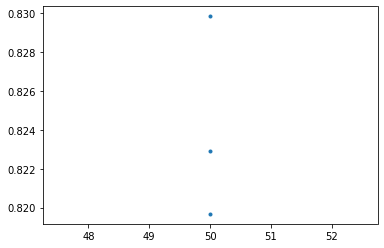

In [248]:
plt.plot(ydf['target'],ydf['r2'],'.')

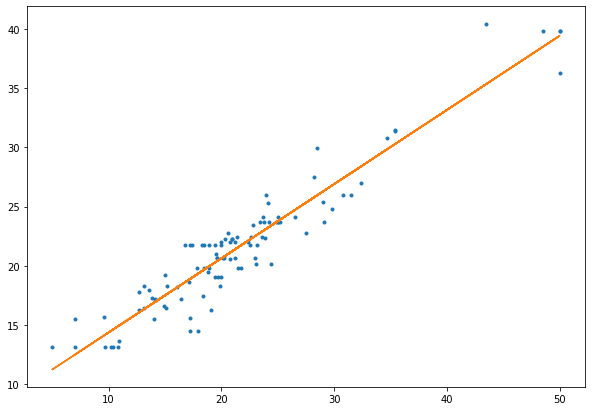

In [242]:
plt.figure(figsize=(10,7))
plt.plot(ytest['target'],ypred,'.')
plt.plot(ytest['target'].values.reshape(-1,1),y_pred_lr,'-')

In [263]:
y=np.random.randint(0,2,10**4)

In [266]:
df=pd.DataFrame(y,columns=['target'])

In [270]:
df.index.name='idx'

In [273]:
df.reset_index(inplace=True)

In [276]:
df['cls']=df.idx.map(lambda x: x//100)

In [279]:
df['mean']=df.groupby('cls')['target'].transform(lambda x: x.mean())

In [325]:
def generate_y(g):
    s=len(g)
    y=np.random.randint(0,2,s)
    p=np.random.randint(0,50,s)
    p=p/p.sum()
    y=np.random.choice(y,s,replace=True,p=p)

    return pd.Series(y,index=g.index)

In [326]:
df['y_']=df.groupby('cls')['cls'].transform(generate_y)

In [327]:
df.groupby('cls')['y_'].mean()

cls
0     0.47
1     0.54
2     0.57
3     0.50
4     0.45
      ... 
95    0.62
96    0.40
97    0.43
98    0.55
99    0.63
Name: y_, Length: 100, dtype: float64

In [2]:
pd.__version__

NameError: name 'pd' is not defined